# Functions & Functional Programming

This session is the third in a series of programming fundamentals. The
concepts here can feel abstract at first, but they are a big part of how
Python code is structured in real projects. By the end, you’ll see how
functions make code shorter, cleaner, and easier to re-use.

The below slides aim to provide an introduction to these concepts and
the way we can use them.

## Slides

Use the left ⬅️ and right ➡️ arrow keys to navigate through the slides
below. To view in a separate tab/window,
<a href="slides.html" target="_blank">follow this link</a>.

## What are Functions?

A function is just a reusable set of instructions that takes input, does
something with it, and gives you a result.

If you’ve used Excel, you already use functions all the time. For
example, SUM(A1:A10) or VLOOKUP(…). You give them arguments (the input),
they process it, and they return an output. If you’ve used SQL, it’s the
same idea. COUNT(\*), ROUND(price, 2), or UPPER(name) are functions.
They save you from writing the same logic over and over, and they keep
code tidy.

In Python, functions work the same way, but you can also write your own
custom ones, so instead of just using what is built-in, you can create
tools that do exactly what you need.

## Simple Built-In & User-Defined Functions

Python already has many built-in functions which makes the language more
functional.

### Print Statements

The `print()` function sends output to the screen. It’s often the first
Python function you use.

In [1]:
print("Hello, World!")

Hello, World!

### Comparing Operations

We’ll compare how to do things “manually” with loops vs. using Python’s
built-in (or imported) functions. This shows how functions save time and
reduce code.

#### Length

We can count the number of items in a list using a for loop.

In [2]:
values = [10, 20, 30, 40, 50]

length_manual = 0
for _ in values:
    length_manual += 1
print("Length:", length_manual)

Length: 5

However, it is much faster to just use `len()` instead.

In [3]:
print("Length:", len(values))

Length: 5

#### Sum

We can also sum the value of all the numbers in our `values` object.

In [4]:
total_manual = 0
for val in values:
    total_manual += val
print("Sum:", total_manual)

Sum: 150

Or we can use `sum()`.

In [5]:
print("Sum:", sum(values))

Sum: 150

#### Mean

Finally, we can manually calculate the mean of our list of values by
summing them and then dividing by the length of the list.

In [6]:
total_for_mean = 0
total_length = 0

for val in values:
    total_for_mean += val

for val in values:
    total_length += 1

mean_manual = total_for_mean / total_length
print("Mean:", mean_manual)

Mean: 30.0

Or we can import numpy and use `np.mean()`.

In [7]:
import numpy as np

values = [10, 20, 30, 40, 50]
print("Mean:", np.mean(values))

Mean: 30.0

### Combining Operations

We can create our own functions to group multiple calculations. The
function below takes two numbers and returns a sentence describing their
sum, difference, and product.

In [8]:
def summarise_numbers(a, b):

    total = a + b
    difference = a - b
    product = a * b
    return (
        f"The sum of {a} and {b} is {total}, "
        f"the difference is {difference}, "
        f"and their product is {product}."
    )

summarise_numbers(10, 5)

'The sum of 10 and 5 is 15, the difference is 5, and their product is 50.'

To illustrate how functions work, we can break them down step-by-step.
`def summarise_numbers(a, b)` is the function header. `def` states that
you are defining a function, `summarise_numbers` is the function name,
and `(a, b)` is the input parameter (the numbers we are summarising).
The function body (the indented code below the header) defines the steps
the function should take, and the `return` statement declares the output
from the function.

## Exploring Data with Functions

We can use functions to explore an entire dataset quickly and
efficiently, where a manual process would require a lot of repetition.

### Setup

First, we will import all of the packages we need.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.datasets import fetch_california_housing

sns.set_theme(style="whitegrid")

### Import Data

We can then import the California housing dataset and store it in
`housing_raw`, before previewing the `housing_raw` object.

In [10]:
housing_raw = fetch_california_housing(as_frame=True).frame
housing_raw.head()

### Preprocess Data

We’ll make a helper function to convert text to `snake_case` (lowercase
with underscores). This is a common style for column names.

In [11]:
def to_snake_case(s: str) -> str:
    """
    Convert a given string to snake_case.
    """
    s = s.strip()  # remove leading/trailing spaces
    s = re.sub(r'[\s-]+', '_', s)  # replace spaces and hyphens with underscores
    s = re.sub(r'(?<=[a-z])(?=[A-Z])', '_', s)  # add underscore before capital letters
    s = re.sub(r'[^a-zA-Z0-9_]', '', s)  # remove anything not letter, number, or underscore
    return s.lower()  # make everything lowercase

This function has the same basic structure as the function we defined
earlier, but with some additional information that is good practice for
writing reproducible code. In the function header, the input `(s: str)`
includes the input parameter `s` and a type-hint starting that `s`
should be a string. The `-> str` immediately after states that the
function will return a string. The triple-quoted text just below the
function header describes what the function does. You can also include
what the function expects and what it returns.

Next, we can create a function that cleans our dataset, including the
`to_snake_case` function as a step in the process. The other step is to
drop all NAs and duplicates.

In [12]:
def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Preprocess a dataframe by cleaning and standardizing column names.
    """
    df = df.dropna().drop_duplicates().copy()  # remove missing rows and duplicates
    df.columns = [to_snake_case(col) for col in df.columns]  # rename columns to snake_case
    return df  # return cleaned dataframe

We can then apply this to our dataset.

In [13]:
df = preprocess_data(housing_raw)
df.head()

### Visualise Distributions

A great way to use functions for exploratory data analysis is for
visualing multiple columns at once. If we visualise every column
manually, this would require a lot of code. However, we can write a
single function that returns a plot for every relevant column in a
single figure.

Below is a function for plotting a histogram for each numeric column in
a single figure.

In [14]:
def plot_numeric_columns(df: pd.DataFrame) -> None:

    """
    plot histograms for all numeric columns in one figure with subplots.
    """
    
    numeric_cols = df.select_dtypes(include=[np.number]).columns  # get numeric column names
    n = len(numeric_cols)  # count how many numeric columns there are
    if n == 0: # if there are no numeric columns  
        print("no numeric columns found") # tell the user
        return # and stop the function

    # determine how many plots per row (max 3)
    ncols = min(n, 3)  # number of columns in subplot grid
    nrows = (n + ncols - 1) // ncols  # number of rows in subplot grid (ceiling division)
    fig, axes = plt.subplots(nrows, ncols, figsize=(6 * ncols, 4 * nrows))  # create figure and axes
    if n == 1:  # if only one numeric column
        axes = [axes]  # put single axis in a list for consistency
    else:
        axes = axes.flatten()  # flatten 2d array of axes into 1d list

    for ax, col in zip(axes, numeric_cols):  # loop through axes and column names
        ax.hist(df[col], bins=20, edgecolor="black")  # draw histogram for column
        ax.set_xlabel(col)  # set x-axis label
        ax.set_ylabel("")  # remove y-axis label

    # remove any extra empty plots
    for ax in axes[len(numeric_cols):]:  # loop over unused axes
        fig.delaxes(ax)  # delete unused subplot

    plt.tight_layout()  # adjust layout so plots don't overlap
    plt.show()  # display the plots

And then we can run this function on our California housing dataset.

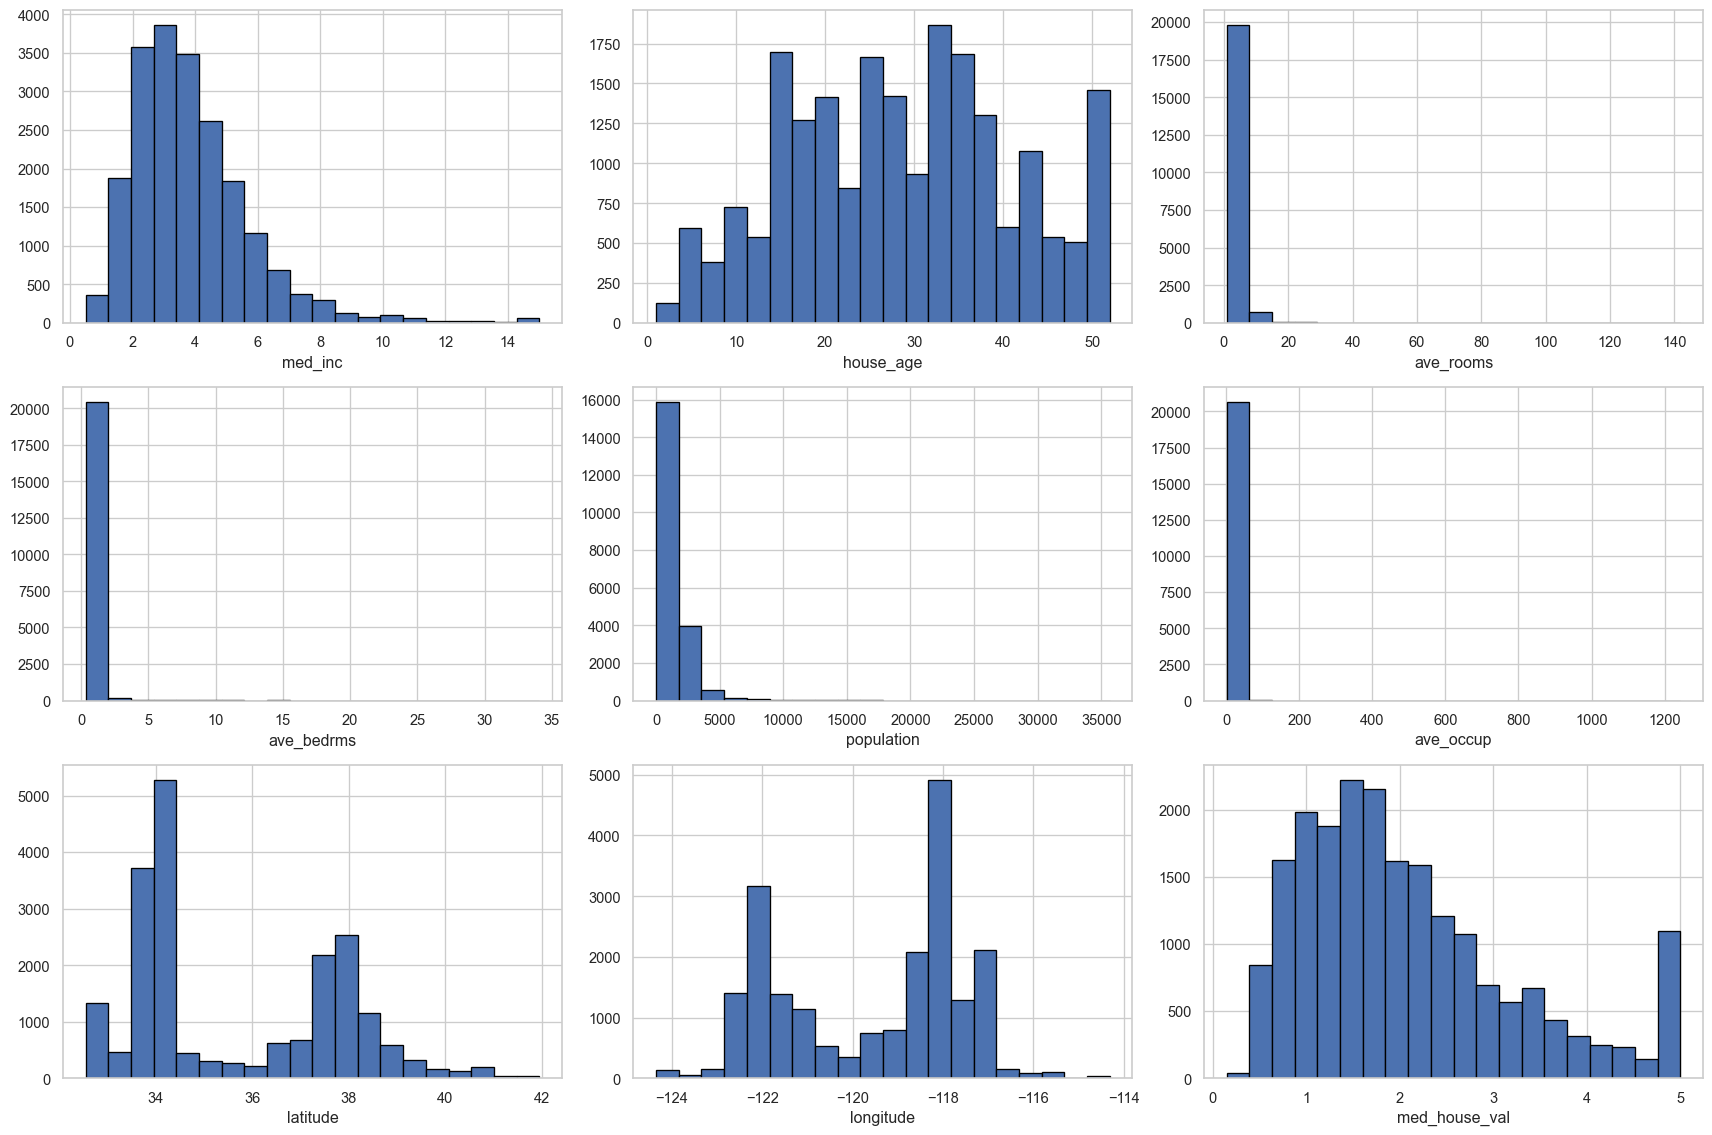

In [15]:
plot_numeric_columns(df)

We can do the same for categorical columns, using bar charts.

In [16]:
def plot_categorical_columns(df: pd.DataFrame) -> None:
    
    """
    plot bar charts for all categorical columns in one figure with subplots.
    """
    
    cat_cols = df.select_dtypes(exclude=[np.number]).columns  # get non-numeric column names
    n = len(cat_cols)  # count how many categorical columns there are
    if n == 0:  # if there are no categorical columns
        print("no categorical columns found")  # tell the user
        return  # and stop the function

    # determine how many plots per row (max 3)
    ncols = min(n, 3)  # number of columns in subplot grid
    nrows = (n + ncols - 1) // ncols  # number of rows in subplot grid (ceiling division)
    fig, axes = plt.subplots(nrows, ncols, figsize=(6 * ncols, 4 * nrows))  # create figure and axes
    if n == 1:  # if only one categorical column
        axes = [axes]  # put single axis in a list for consistency
    else:
        axes = axes.flatten()  # flatten 2d array of axes into 1d list

    for ax, col in zip(axes, cat_cols):  # loop through axes and column names
        df[col].value_counts().plot(kind="bar", ax=ax, edgecolor="black")  # draw bar chart
        ax.set_xlabel(col)  # set x-axis label
        ax.set_ylabel("")  # remove y-axis label

    # remove any extra empty plots
    for ax in axes[len(cat_cols):]:  # loop over unused axes
        fig.delaxes(ax)  # delete unused subplot

    plt.tight_layout()  # adjust layout so plots don't overlap
    plt.show()  # display the plots

However, there are no categorical columns in this dataset[1].

[1] This is just here as a demonstration of how you would do this with
categorical columns, and to show what it would look like if the function
cannot find relevant columns and stops early.

In [17]:
plot_categorical_columns(df)

no categorical columns found

## Summary

Functions let you package steps into reusable, predictable tools. You
will have used functions before in other settings, and when writing
Python code you will regularly encounter built-in functions and
functions imported from packages. The more you work in Python, the more
you’ll see yourself building small helper functions to avoid repeating
code.

## Exercises

1.  Write a function that returns the maximum and minimum values in a
    list.

> **Solution**
>
> ``` python
> def min_max(lst):
>     return min(lst), max(lst)
>
> min_max([4, 1, 9])
> ```
>
>     (1, 9)

1.  Modify `summarise_numbers` to also return the division result (a /
    b).

> **Solution**
>
> ``` python
> def summarise_numbers(a, b):
>     total = a + b
>     difference = a - b
>     product = a * b
>     division = a / b
>     return total, difference, product, division
>
> summarise_numbers(5, 10)
> ```
>
>     (15, -5, 50, 0.5)

1.  Write a function that counts how many even numbers are in a list.

*Hint: This requires using a ‘modulo operator’*[1].

> **Solution**
>
> ``` python
> def count_evens(lst):
>     return sum(1 for x in lst if x % 2 == 0)
>
> values = [1, 2, 3, 4, 5]
> count_evens(values)
> ```
>
>     2

For the next three questions, you can use this sample dataset:

[1] If you don’t know what a modulo operator is (totally
understandable), you can search this online and it will likely help you
find the answer to this question. It is always okay (encouraged, even)
to search for answers to code questions online.

In [21]:
sample_df = pd.DataFrame({
    "Name": np.random.choice(["Alice", "Bob", "Charlie", "John"], size=20),
    "Department": np.random.choice(["HR", "IT", "Finance"], size=20),
    "Age": np.random.randint(21, 60, size=20),
    "Salary": np.random.randint(30000, 80000, size=20),
    "Years_at_Company": np.random.randint(1, 20, size=20)
})

1.  Create a function that takes a dataframe and returns only columns
    with numeric data.

> **Solution**
>
> ``` python
> def select_numeric(df):
>     return df.select_dtypes(include=[np.number])
>
> select_numeric(sample_df)
> ```
>
> <div>
> <style scoped>
>     .dataframe tbody tr th:only-of-type {
>         vertical-align: middle;
>     }
>
>     .dataframe tbody tr th {
>         vertical-align: top;
>     }
>
>     .dataframe thead th {
>         text-align: right;
>     }
> </style>
>
> |     | Age | Salary | Years_at_Company |
> |-----|-----|--------|------------------|
> | 0   | 55  | 67778  | 6                |
> | 1   | 31  | 61814  | 2                |
> | 2   | 26  | 75297  | 13               |
> | 3   | 25  | 73928  | 3                |
> | 4   | 48  | 72208  | 15               |
> | 5   | 42  | 50243  | 8                |
> | 6   | 22  | 34121  | 6                |
> | 7   | 39  | 35712  | 10               |
> | 8   | 34  | 76451  | 9                |
> | 9   | 45  | 36372  | 2                |
> | 10  | 35  | 58110  | 16               |
> | 11  | 50  | 45524  | 19               |
> | 12  | 47  | 68371  | 17               |
> | 13  | 49  | 66038  | 8                |
> | 14  | 30  | 37095  | 19               |
> | 15  | 59  | 43482  | 15               |
> | 16  | 29  | 69648  | 18               |
> | 17  | 22  | 52816  | 3                |
> | 18  | 57  | 63714  | 5                |
> | 19  | 55  | 52307  | 4                |
>
> </div>

1.  Rewrite `plot_numeric_columns` so it uses seaborn’s `histplot`
    instead of matplotlib’s `hist`.

> **Solution**
>
> ``` python
> def plot_numeric_columns(df):
>     numeric_cols = df.select_dtypes(include=[np.number]).columns
>     for col in numeric_cols:
>         sns.histplot(df[col], bins=20)
>         plt.show()
>
> plot_numeric_columns(sample_df)
> ```
>
> 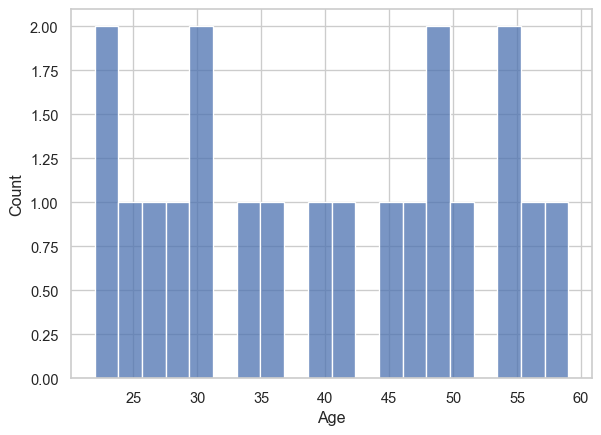
>
> 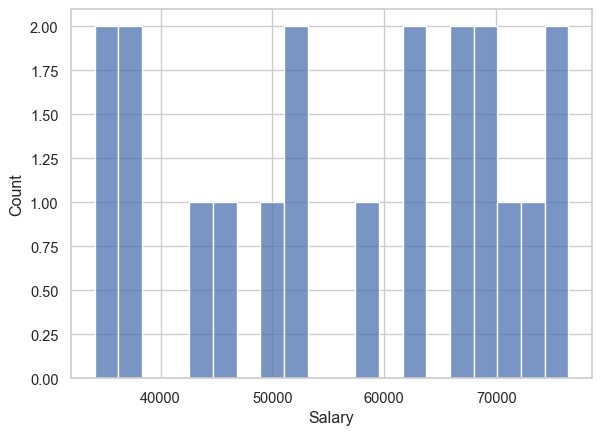
>
> 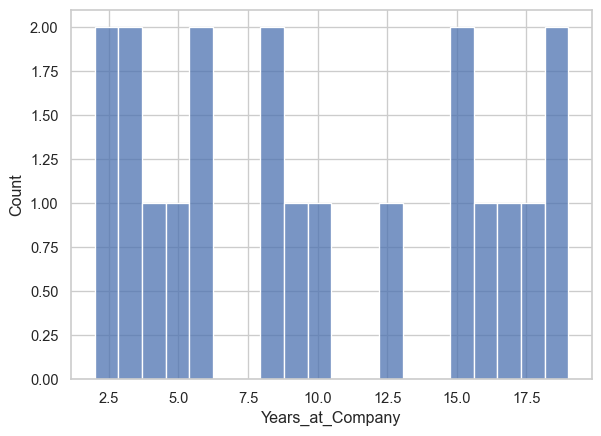

1.  Write a function that converts all string columns in a dataframe to
    lowercase.

> **Solution**
>
> ``` python
> def lowercase_strings(df):
>     for col in df.select_dtypes(include=['object']):
>         df[col] = df[col].str.lower()
>     return df
>
> lowercase_strings(sample_df)
> ```
>
> <div>
> <style scoped>
>     .dataframe tbody tr th:only-of-type {
>         vertical-align: middle;
>     }
>
>     .dataframe tbody tr th {
>         vertical-align: top;
>     }
>
>     .dataframe thead th {
>         text-align: right;
>     }
> </style>
>
> |     | Name    | Department | Age | Salary | Years_at_Company |
> |-----|---------|------------|-----|--------|------------------|
> | 0   | charlie | it         | 55  | 67778  | 6                |
> | 1   | charlie | hr         | 31  | 61814  | 2                |
> | 2   | charlie | hr         | 26  | 75297  | 13               |
> | 3   | bob     | it         | 25  | 73928  | 3                |
> | 4   | charlie | it         | 48  | 72208  | 15               |
> | 5   | john    | hr         | 42  | 50243  | 8                |
> | 6   | alice   | finance    | 22  | 34121  | 6                |
> | 7   | john    | finance    | 39  | 35712  | 10               |
> | 8   | alice   | hr         | 34  | 76451  | 9                |
> | 9   | bob     | hr         | 45  | 36372  | 2                |
> | 10  | john    | it         | 35  | 58110  | 16               |
> | 11  | charlie | it         | 50  | 45524  | 19               |
> | 12  | bob     | hr         | 47  | 68371  | 17               |
> | 13  | bob     | hr         | 49  | 66038  | 8                |
> | 14  | john    | hr         | 30  | 37095  | 19               |
> | 15  | bob     | it         | 59  | 43482  | 15               |
> | 16  | charlie | it         | 29  | 69648  | 18               |
> | 17  | charlie | it         | 22  | 52816  | 3                |
> | 18  | alice   | it         | 57  | 63714  | 5                |
> | 19  | alice   | it         | 55  | 52307  | 4                |
>
> </div>